In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [2]:
diabetes = pd.read_csv('Diabetes_data.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
diabetes.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

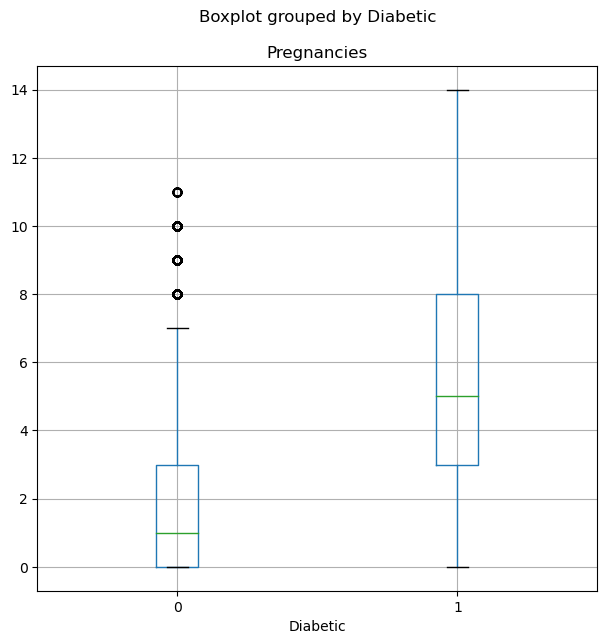

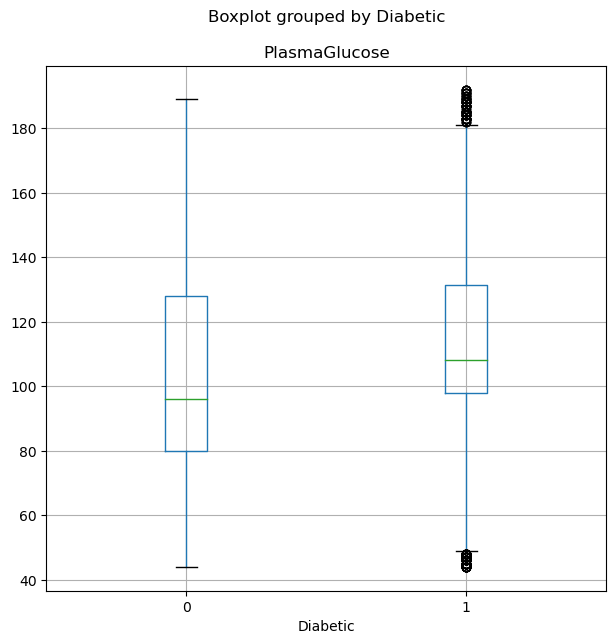

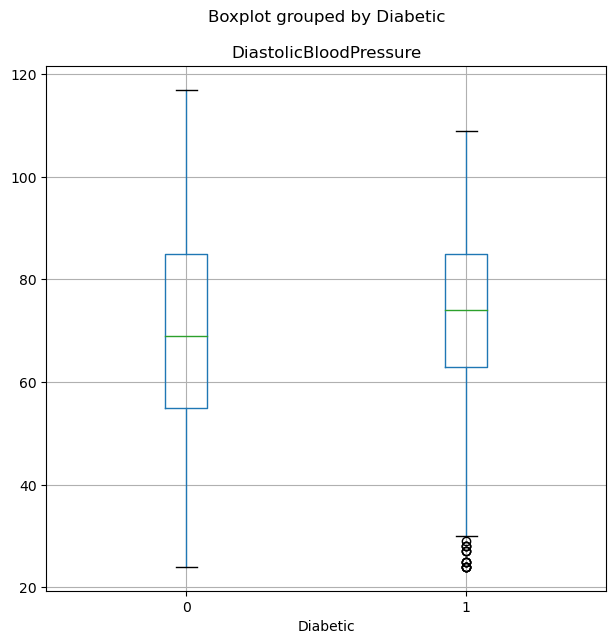

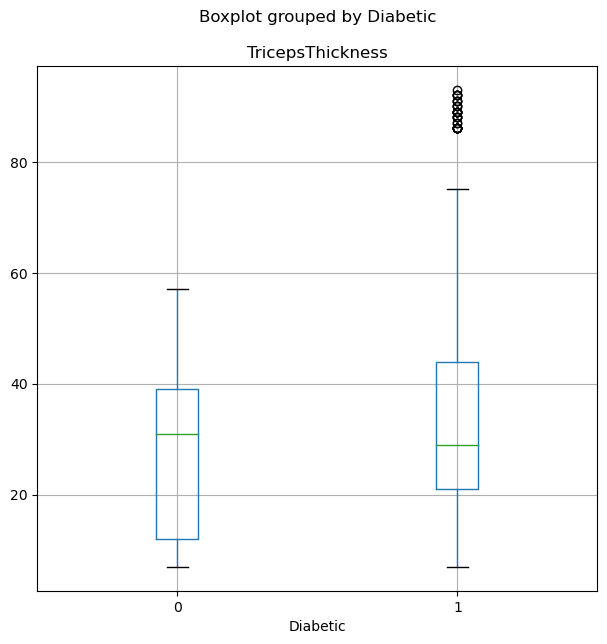

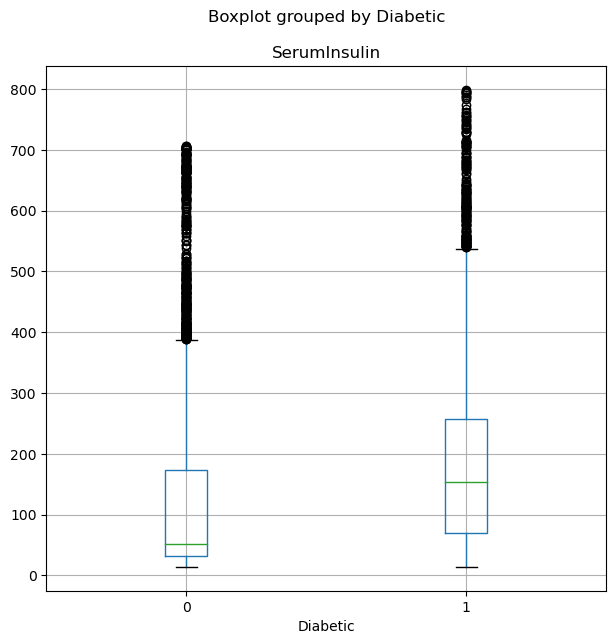

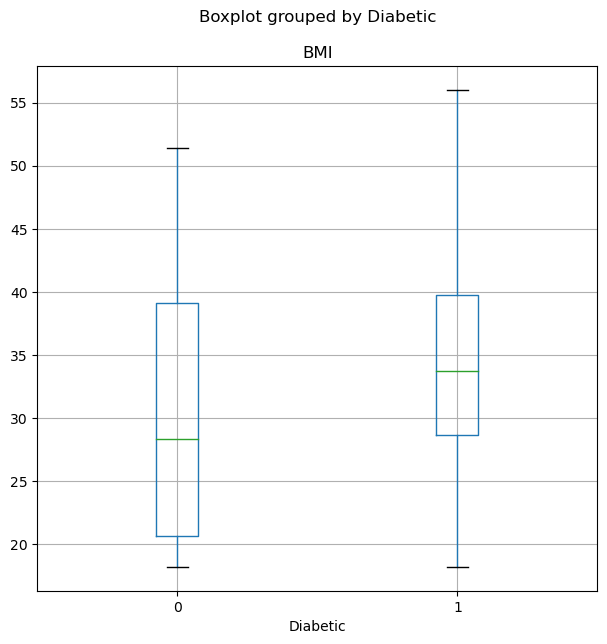

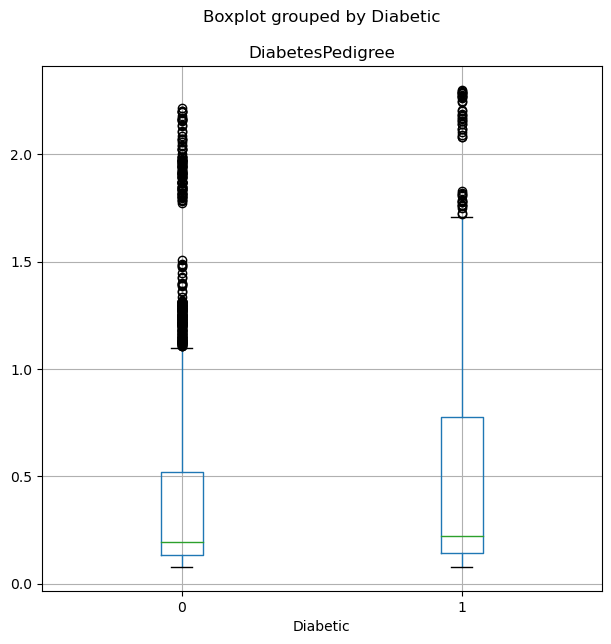

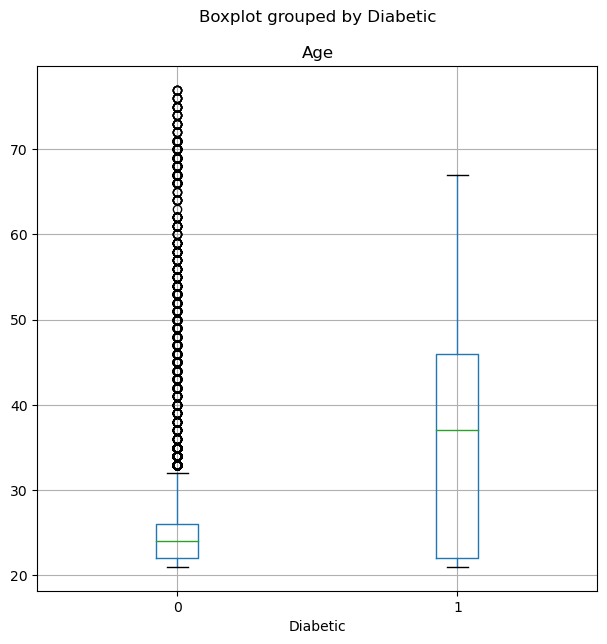

In [4]:
# Seperating features and target

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

target = ['Diabetic']

for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(7,7))
    plt.title(col)
    
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = diabetes[features].values, diabetes[target].values

# Splitting data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f'Training Set: {X_train.shape[0]}, Test Set: {X_test.shape[0]}')

Training Set: 10500, Test Set: 4500


In [10]:
# Train the model

from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# Train the logistic regression model on the training set
lr = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = lr.predict(X_test)
print(f'Predicted Labels: {predictions}\nActual Labels: {y_test}\n')

print(f'Accuracy Score: {accuracy_score(y_test, predictions)}')

Predicted Labels: [0 0 0 ... 0 1 0]
Actual Labels: [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]

Accuracy Score: 0.7893333333333333


In [11]:
from sklearn.metrics import precision_score, recall_score

print(f'Overall Precision: {precision_score(y_test, predictions)}')
print(f'Overall Recall: {recall_score(y_test, predictions)}')

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333


In [12]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2638  348]
 [ 600  914]]


* A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [13]:
y_scores = lr.predict_proba(X_test)
print(y_scores)

[[0.81657116 0.18342884]
 [0.9630332  0.0369668 ]
 [0.80872619 0.19127381]
 ...
 [0.60692458 0.39307542]
 [0.10656641 0.89343359]
 [0.63859127 0.36140873]]


* The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

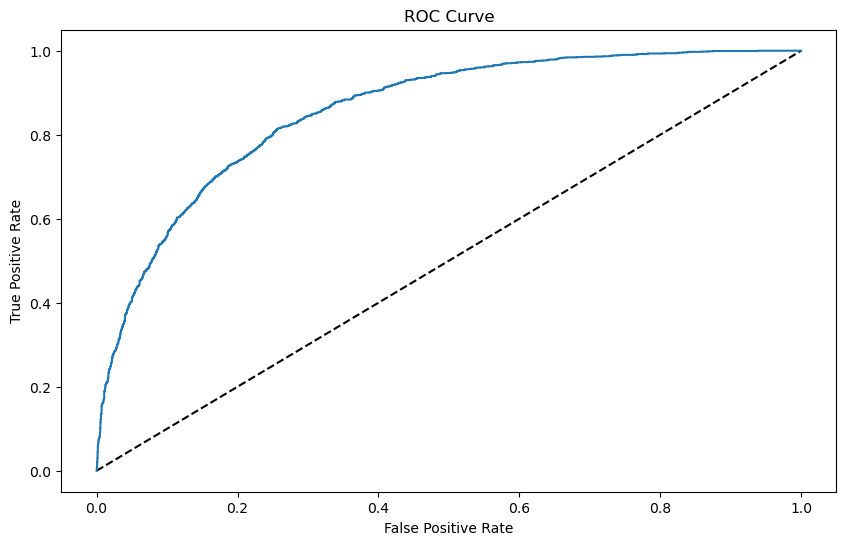

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Calculate ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])

# Plot the ROC curve

plt.figure(figsize=(10,6))

# Plotting the diagonal 50% line
plt.plot([0,1], [0,1], 'k--')

# Plotting FPR and TPR achieved by the model

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568444904932839
